### 用語

入力値：\\( x \\)

重みベクトル：\\( w \\)

総入力：\\( z = w_1x_1 + ... + w_mx_m = w^Tx \\)

しきい値：\\( \theta \\)


活性化関数(単位ステップ関数、ヘビサイド関数):\\( \phi \\)

$$ \phi = \begin{eqnarray}\left\{\begin{array}{l}1(z\geqq\theta) \\ -1(z<\theta)\end{array}\right.\end{eqnarray} $$

学習率：\\( \eta \\)

### パーセプトロンの学習規則

1. 重みを0または値の小さい乱数で初期化
1. トレーニングサンプル\\( x^{(i)} \\)ごとに以下の手順を実行

a.出力値\\( \hat{y} \\)を計算する

b.重みを更新する

#### 各重み\\( w_j \\)の更新法
$$ w_j := w_j + \Delta w_j $$

#### \\( \Delta w_j \\)の算出
$$ \Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)} $$
\\( y^{(i)} \\)：本当のクラスラベル

\\( \hat{y}^{(i)} \\)：予測されたクラスラベル

#### 予測が当たった場合は重みは更新されない

$$ \Delta w_j = \eta(1 - 1)x_j^{(i)} = 0 $$
$$ \Delta w_j = \eta(-1 - (-1))x_j^{(i)} = 0 $$

#### 予測が当たらなかった場合は重みが更新される

$$ \Delta w_j = \eta(-1 - 1)x_j^{(i)} = \eta(-2)x_j^{(i)} $$
$$ \Delta w_j = \eta(1 - (-1))x_j^{(i)} = \eta(2)x_j^{(i)} $$

#### 　\\( w_0 \\) のみ違う計算式となる

$$ \Delta w_0 = \eta(-1 - output^{(i)}) $$
$$ \Delta w_1 = \eta(1 - output^{(i)})x_1^{(i)} $$

In [39]:
import numpy as np

class Perceptron(object):
    """
    eta: 学習率(0.0<eta<1.0)
    n_iter: トレーニング回数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        X: トレーニングデータ（行にサンプル、列に特徴量）
        Y: 目的変数
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for ite in range(self.n_iter):
            print('w:', self.w_)
            errors = 0
            for xi, target in zip(X, y):
                print('xi:', xi)
                #重みw1,...,wmの更新
                predict = self.predict(xi)
                update = self.eta * (target - predict)
                #print('target:', target, ' predict:', predict, ' update:', update)
                self.w_[1:] += update + xi
                # 重みw0の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                error = int(update != 0.0)
                print('error:', error)
                errors += error
            # 反復回数ごとの誤差を格納
            print(ite, ': ', errors)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        #print('w_', self.w_)
        #print('net_input_result:', result)
        return result
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
#  重み更新
print('重み更新あり', int (0.5 != 0.0))
print('重み更新なし', int (0.0 != 0.0))

重み更新あり 1
重み更新なし 0


In [10]:
import numpy as np

data = np.array([100, 200, 300, 400, 500])
# 値を取得
print(data[data < 300])
# インデックスを取得
print(np.where(data < 300))
# 真の場合、偽の場合で1, -1を返す
print(np.where(data < 300, 1, -1))

[100 200]
(array([0, 1]),)
[ 1  1 -1 -1 -1]


       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


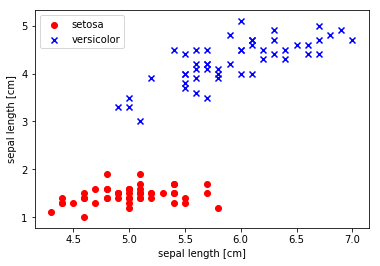

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()


X: [[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4

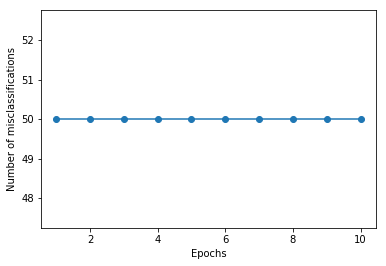

In [40]:
ppn = Perceptron(eta=0.1, n_iter=10)
print('X:', X)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()